### Program to look at data files and measure time for VENUS control parameters to settle

Method:
- Watch system for 50 dt's (dt is time to measure/write one state snapshot with a 0.37 s pause in between)
- Make a change
- Watch system for 750 dt's
- (Exception: watch additional dt's when changing superconductors until change is done.  These files have length 50+(# of snapshots+0.37s until change done)+750 dt's

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import datetime
import pytz

plt.rcParams['figure.dpi']=150
plt.rcParams['font.family'] = 'Serif'

DATAFOLDER = "datafiles/"
IMAGEFOLDER = ""

In [2]:
def savepng(pngname): 
    plt.savefig(IMAGEFOLDER+pngname+".png", bbox_inches="tight", facecolor='w')
symbols = ['o','X','s','v','p','P','*','h','<','3','d','x','+']

In [3]:
def load_tracking(name):
    with open(name) as datafile:
        content = datafile.readlines()
        data = np.array([np.fromstring(c, sep=' ') for c in content])
    return data[:,0],data[:,1:]

def load_names(filename):
    with open(filename) as datafile:
        names = []
        nl = 0
        while datafile.readline(): nl=nl+1
        datafile.seek(0)
        for i in range(nl):
            names.append(datafile.readline()[3:])
    return names[1:]

names = load_names(DATAFOLDER + 'balzer_1673709937')  # load the names of the different columns
labels=['M/Q','fcv in',r'O$^{7+}$ [$\mu$A]','balzer 1','balzer 2','balzer 5','balzer 6','balzer 7',
        'gas 1','gas 2','gas 5','gas 6','gas 7',r'I$_\mathrm{inj}$ [A]',r'I$_\mathrm{ext}$ [A]',
        r'I$_\mathrm{mid}$ [A]',r'I$_\mathrm{sext}$ [A]',r'V$_\mathrm{inj}$ [V]',r'V$_\mathrm{ext}$ [V]',
        r'V$_\mathrm{mid}$ [V]',r'V$_\mathrm{sext}$ [V]',r'Vps$_\mathrm{inj}$ [V]',r'Vps$_\mathrm{ext}$ [V]',
        r'Vps$_\mathrm{mid}$ [V]',r'Vps$_\mathrm{sext}$ [V]',r'injection pressure [$\cdot 10^{-7}$ torr]',
        r'extraction pressure [$\cdot 10^{-7}$ torr]',r'V$_\mathrm{bias}$ [V]',r'I$_\mathrm{bias}$ [mA]',
        '18 GHz power [kW]','reflected 18 GHz power [W]','28 GHz power [kW]',r'I$_\mathrm{glaser}$ [A]',
        r'I$_\mathrm{batman}$ [A]',r'B$_\mathrm{batman}$ [gauss]','x-ray source','x-ray exit',
        r'V$_\mathrm{extraction}$ [kV]',r'I$_\mathrm{drain}$ [mA]',r'V$_\mathrm{[puller]}$ [kV]',
        r'I$_\mathrm{[puller]}$ [mA]','puller raw gap',r'beam line pressure [$\cdot 10^{-9}$ torr]',
        r'I$_\mathrm{robin}$ [A]',r'V$_\mathrm{HT-oven}$ [V]',r'I$_\mathrm{HT-oven}$ [A]','LT oven 1 set point',
        'LT oven 2 set point','LT oven 1 temp [C]','LT oven 2 temp [C]','LHe pressure [PSI]','LHe level',
        'cryo vac pressure [torr]','4K heater power [W]','4K cold mass [K]','4K cryo E [K]',
        '4K cryo W [K]','4K cryo NE [K]','4K cryo NW [K]','4K heat cond [K]','4K feedthrough [K]',
        '4K heater [K]','50K cond bar [K]','50K cond bar NE [K]','50K cond bar NW [K]','50K shield [K]',
        'bottom LN vessel [K]','70K cond bar [K]','set balz 1','set balz 2','set balz 5','set balz 6','set balz 7',
        r'set I$_\mathrm{inj}$ [A]',r'set I$_\mathrm{ext}$ [A]',r'set I$_\mathrm{mid}$ [A]',
        r'set I$_\mathrm{sext}$ [A]',r'set P$_\mathrm{18}$ [W]',r'set P$_\mathrm{28}$ [W]',
        r'set I$_\mathrm{glaser}$ [A]',r'set I$_\mathrm{batman}$ [A]',r'set V$_\mathrm{ext}$ [V]',
        r'set V$_\mathrm{puller}$ [V]',r'set I$_\mathrm{robin}$ [A]']

In [4]:
def makeline(ist,num2print,names):
    a = ''
    for i in range(num2print):
        num = str(ist+i)
        if len(num)<2: num='0'+num
        thisone = names[ist+i][:-1]
        if len(thisone)>10: thisone = thisone[:10]
        while len(thisone)<10: thisone=thisone+' '
        a = a+num+':'+thisone+' '
    return(a)

# Show list of parameters in data file and their index number
for i in range(int(len(names)/7)):
    print(makeline(i*7,7,names))   
print(makeline(int(len(names)/7)*7,len(names)-int(len(names)/7)*7,names))       

00:3709938.24 01:3709939.06 02:3709939.84 03:3709940.50 04:3709941.27 05:3709942.08 06:3709942.75 
07:3709943.41 08:3709944.24 09:3709944.91 10:3709945.62 11:3709946.43 12:3709947.10 13:3709947.77 
14:3709948.57 15:3709949.36 16:3709950.02 17:3709950.67 18:3709951.51 19:3709952.24 20:3709952.90 
21:3709953.62 22:3709954.43 23:3709955.07 24:3709955.73 25:3709956.42 26:3709957.07 27:3709957.87 
28:3709958.62 29:3709959.30 30:3709959.97 31:3709960.80 32:3709961.57 33:3709962.24 34:3709963.07 
35:3709963.83 36:3709964.49 37:3709965.22 38:3709966.04 39:3709966.71 40:3709967.36 41:3709968.14 
42:3709968.91 43:3709969.57 44:3709970.24 45:3709971.07 46:3709971.76 47:3709972.52 48:3709973.33 
49:3709975.04 50:3709975.71 51:3709976.50 52:3709977.30 53:3709978.01 54:3709978.66 55:3709979.47 
56:3709980.24 57:3709980.91 58:3709981.56 59:3709982.40 60:3709983.15 61:3709983.82 62:3709984.55 
63:3709985.37 64:3709986.05 65:3709986.73 66:3709987.51 67:3709988.30 68:3709988.97 69:3709989.62 
70:3709990

In [5]:
# Get data sets.  All should live in the directory data in the same directory as this notebook
import glob
dataset = 7   # 0:balzer, 1:28GHz, 2:18GHz 3:inj 4:ext 5:mid 6:sext 7:bias
filest = ['balzer_*','p28_*','p18_*','inj_*','ext_*','mid_*','sext_*',"bias_*"]
files = []
for file in glob.glob(DATAFOLDER+filest[dataset]):
    files.append(file)
files.sort()
#print(files)

Text(0, 0.5, 'O$^{7+}$ [$\\mu$A]')

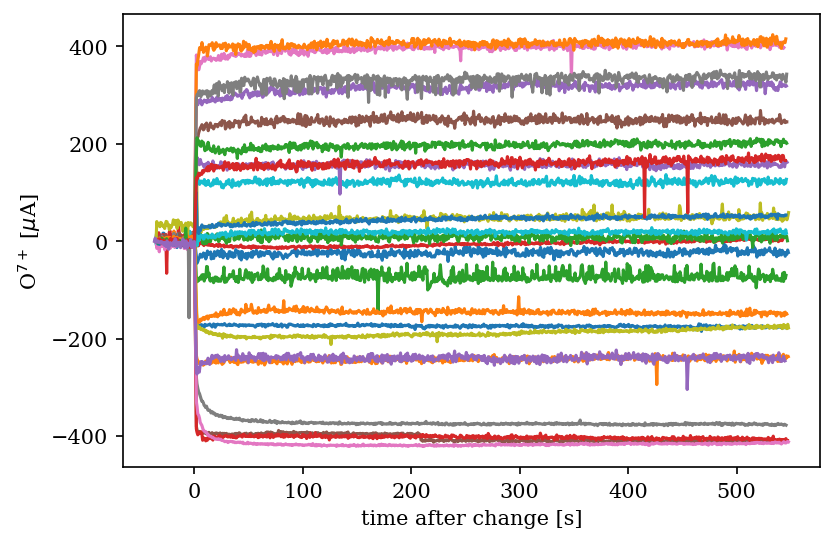

In [6]:
# raw data...no time averaging
yset = 2 # 2:Ibeam 25:Pinj
normalize = 0  # 0: not normalized, 1: normalized to t=0 value, 2: normalized to t[-1]-t[t=0] value
for i in range(len(files)):
    time,data = load_tracking(files[i])
    if normalize ==0:
        plt.plot(time-time[49],(data[:,yset]-data[0,yset])*1.0e6)
    if normalize ==1:
        plt.plot(time-time[49],(data[:,yset]-data[49,yset])/data[49,yset]*100)
    if normalize ==2:
        plt.plot(time-time[49],(data[:,yset]-data[49,yset])/(np.mean(data[-50:,yset])-data[49,yset]))
        plt.ylim([-.1,1.1])
plt.xlabel('time after change [s]')
plt.ylabel(labels[yset])

Text(0.5, 0, 'time after change [s]')

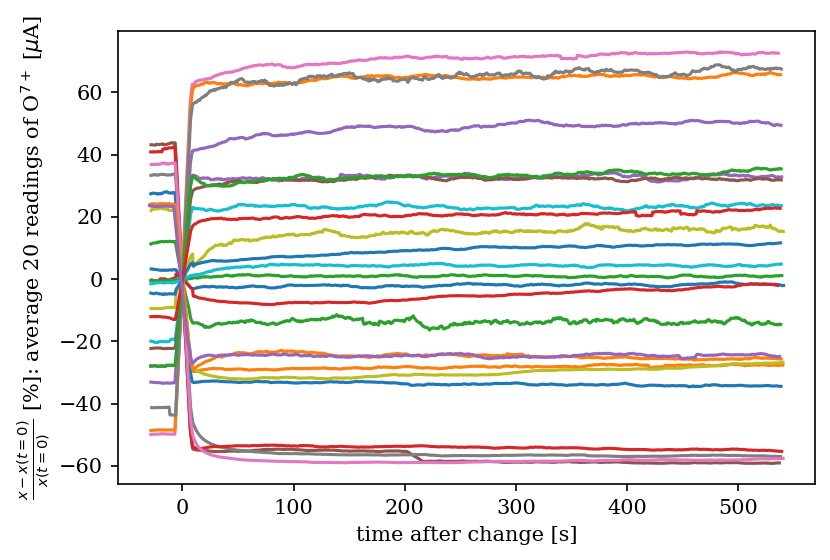

In [7]:
yset = 2 # 2:Ibeam 25:Pinj
normalize = 1
lenave = 20
mult = 1
if yset==2: mult = 1e6
for i in range(len(files)):
    time,data = load_tracking(files[i])
    dataave = data[:-lenave,yset]
    for j in range(len(time)-lenave):
        dataave[j] = np.mean(data[j:j+lenave,yset])
    if normalize ==0:
        plt.plot(time[0:-lenave]+(time[int(lenave/2.0)]-time[0])-time[49],(dataave[:]-dataave[0])*mult)
        plt.ylabel('averaged '+str(lenave)+' readings: '+labels[yset])
    if normalize ==1:
        plt.plot(time[0:-lenave]+(time[int(lenave/2.0)]-time[0])-time[49],(dataave-dataave[49-int(lenave/2.0)])/dataave[49-int(lenave/2.0)]*100)
        plt.ylabel(r'$\frac{x-x(t=0)}{x(t=0)}$ [%]: average '+str(lenave)+' readings of '+labels[yset])
    if normalize ==2:
        plt.plot(time[0:-lenave]+(time[int(lenave/2.0)]-time[0])-time[49],(dataave-dataave[49-int(lenave/2.)])/(np.mean(dataave[-50:])-dataave[49-int(lenave/2.)]))
        plt.ylabel(r'$\frac{x-x(t=0)}{x(t_{final}-x(t=0)}$: average '+str(lenave)+' readings of '+labels[yset])
        #plt.ylim([-.1,1.1])
    #plt.plot(time-time[0],(data[:,yset]))
plt.xlabel('time after change [s]')
#savepng('change_time_sext')

00:m_over_q   01:fcv1_in    02:fcv1_i     03:gas_balzer 04:gas_balzer 05:gas_balzer 06:gas_balzer 
07:gas_balzer 08:gas_name_1 09:gas_name_2 10:gas_name_5 11:gas_name_6 12:gas_name_7 13:inj_i      
14:ext_i      15:mid_i      16:sext_i     17:inj_v      18:ext_v      19:mid_v      20:sext_v     
21:inj_ps_v   22:ext_ps_v   23:mid_ps_v   24:sext_ps_v  25:inj_mbar   26:ext_mbar   27:bias_v     
28:bias_i     29:k18_fw     30:k18_ref    31:g28_fw     32:glaser_1   33:batman_i   34:batman_fie 
35:x_ray_sour 36:x_ray_exit 37:extraction 38:extraction 39:puller_v   40:puller_i   41:puller_raw 
42:bl_mig2_to 43:robin_i    44:ht_oven_v  45:ht_oven_i  46:lt_oven_1_ 47:lt_oven_2_ 48:lt_oven_1_ 
49:lt_oven_2_ 50:LHe_psi    51:LHe_level_ 52:cryo_vac_t 53:four_k_hea 54:four_k_col 55:four_k_cry 
56:four_k_cry 57:four_k_cry 58:four_k_cry 59:four_k_hea 60:four_k_i_f 61:four_k_hea 62:fifty_k_co 
63:fifty_k_co 64:fifty_k_co 65:fifty_k_sh 66:bottom_ln_ 67:seventy_k_ 68:gas_balzer 69:gas_balzer 
70:gas_balzer 71:gas_balzer 72:gas_balzer 73:inj_i_set  74:ext_i_set  75:mid_i_set  76:sext_i_set 
77:k18_fw_set 78:g28_req_se 79:glaser_1_s 80:batman_i_s 81:extraction 82:puller_v_s 83:robin_i_s

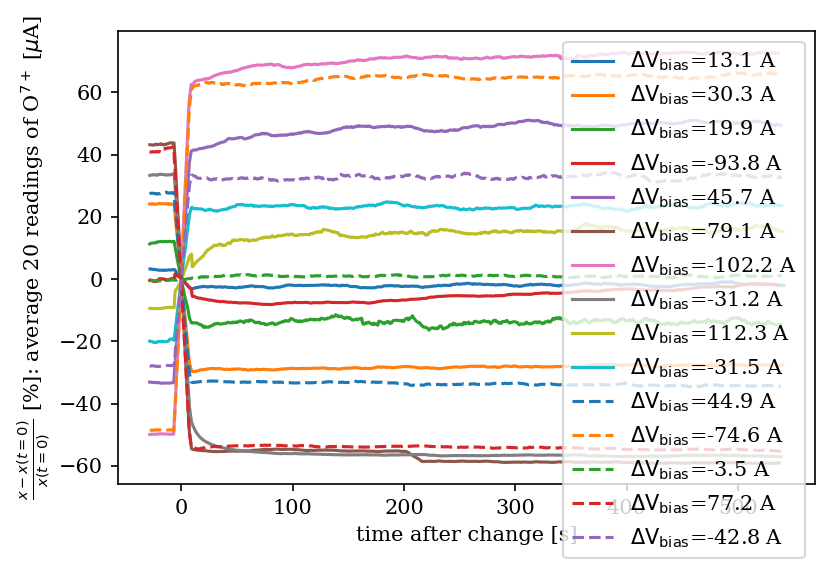

In [8]:
#  This is only for coils
yset = 2 # 2:Ibeam 25:Pinj
normalize = 1
lenave = 20
mult = 1
if yset==2: mult = 1e6



#dataset = 1   # 0:balzer, 1:28GHz, 2:18GHz 3:inj 4:ext 5:mid 6:sext 7:bia
for i in range(len(files)-10):
    time,data = load_tracking(files[i])
    dataave = data[:-lenave,yset]
    if dataset == 0:
        strd = r'$\Delta$balzer='+str(int((np.mean(data[-20:,4])-np.mean(data[:20,4]))*100)/100.0)
    if dataset == 1:
        idx = 31
        strd = r'$\Delta$ 28 GHz='+str(int((np.mean(data[-20:,31])-np.mean(data[:20,31])))) + ' W'
    if dataset == 2:
        idx = 29
        strd = r'$\Delta$ 18 GHz='+str(int((np.mean(data[-20:,29])-np.mean(data[:20,29])))) + ' W'
    if dataset >=3 and dataset<7:  
        idx = 10+dataset
        strd = r'$\Delta$I='+str(int((np.mean(data[-20:,idx])-np.mean(data[:20,idx]))*100)/100.0) + ' A'
    if dataset == 7:
        strd = r'$\Delta\mathrm{V_{bias}}$='+str(int((np.mean(data[-20:,27])-np.mean(data[:20,27]))*10)/10.0) + ' A'
    if i<10: linetype = '-'
    else: linetype = '--'
    for j in range(len(time)-lenave):
        dataave[j] = np.mean(data[j:j+lenave,yset])
    if normalize ==0:
        plt.plot(time[0:-lenave]+(time[int(lenave/2.0)]-time[0])-time[49],(dataave[:]-dataave[0])*mult,linetype,label=strd)
        plt.ylabel('averaged '+str(lenave)+' readings: '+labels[yset])
    if normalize ==1:
        plt.plot(time[0:-lenave]+(time[int(lenave/2.0)]-time[0])-time[49],(dataave-dataave[49-int(lenave/2.0)])/dataave[49-int(lenave/2.0)]*100,linetype,label=strd)
        plt.ylabel(r'$\frac{x-x(t=0)}{x(t=0)}$ [%]: average '+str(lenave)+' readings of '+labels[yset])
    if normalize ==2:
        plt.plot(time[0:-lenave]+(time[int(lenave/2.0)]-time[0])-time[49],(dataave-dataave[49-int(lenave/2.)])/(np.mean(dataave[-50:])-dataave[49-int(lenave/2.)]),linetype,label=strd)
        plt.ylabel(r'$\frac{x-x(t=0)}{x(t_{final}-x(t=0)}$: average '+str(lenave)+' readings of '+labels[yset])
        #plt.ylim([-.1,1.1])
    #plt.plot(time-time[0],(data[:,yset]))
plt.xlabel('time after change [s]')
plt.legend()
savepng('change_time_bias')